##Experiment-12

**AIM:To perform template matching on various images using OpenCV and evaluate the accuracy of the template matching algorithm by locating a sub-image (template) within a larger image.**

**Theory:**

Template matching is a technique in computer vision for finding a specific pattern or sub-image (template) within a larger image. It involves sliding the template image over the target image (larger image) and comparing the template against the region of the target image it is currently overlapping. The similarity between the template and the target image is computed using various methods, such as:

cv2.TM_CCOEFF_NORMED: This method normalizes the result to reduce the influence of image intensity variations. It calculates the correlation coefficient between the template and the image region, where higher values indicate better matches.
The result of template matching is a grayscale image where each pixel value represents the match quality between the template and the region of the larger image at that location. The best match is typically identified by finding the maximum value in the result matrix.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import glob

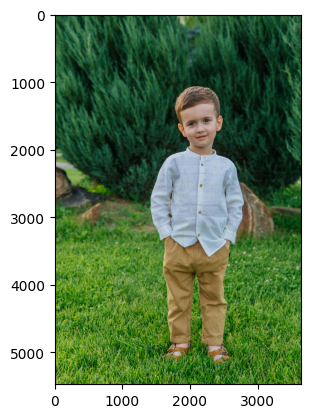

In [ ]:
boy = cv2.imread('/content/drive/MyDrive/colab for cvr/boy_image.jpg')
boy = cv2.cvtColor(boy, cv2.COLOR_BGR2RGB)
plt.imshow(boy)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


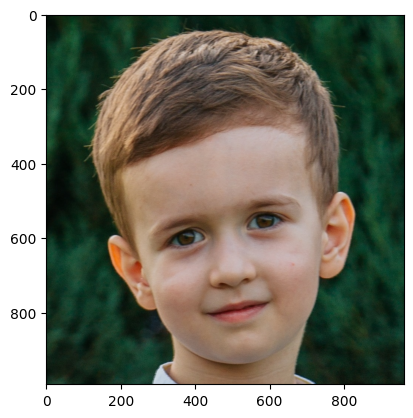

In [ ]:
face = cv2.imread('/content/drive/MyDrive/colab for cvr/boy_crop_template.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [ ]:
face.shape

(993, 961, 3)

In [ ]:
template_height,template_width,channels = face.shape

In [ ]:
template_height

993

In [ ]:
template_width

961

In [ ]:
channels

3

In [ ]:
results = cv2.matchTemplate(boy,face,cv2.TM_CCOEFF_NORMED)

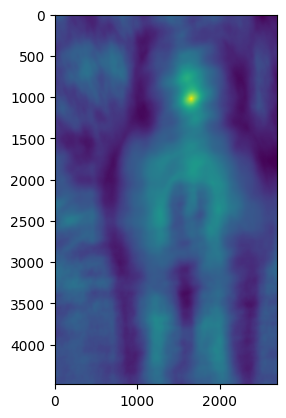

In [ ]:
plt.imshow(results)


In [ ]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(results)

In [ ]:
min_val

-0.3432845175266266

In [ ]:
max_val

0.9995942711830139

In [ ]:
min_loc

(2687, 1749)

In [ ]:
max_loc

(1649, 1025)

In [ ]:
top_left = max_loc
top_left

(1649, 1025)

In [ ]:
bottom_right = (top_left[0]+template_width,top_left[1]+template_height)
bottom_right

(2610, 2018)

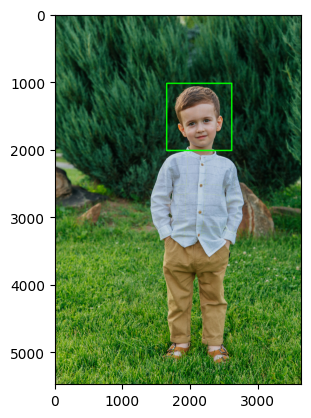

In [ ]:
cv2.rectangle(boy,top_left,bottom_right,(0,255,0),20)
plt.imshow(boy)

# TASK

1. Import 'horses.png' and 'horse_face.png' image. Consider 'horse_face.png' as a template of 'horses.png' image.
2. Apply template matching using Normalized Cross-Correlation (cv2.TM_CCOEFF_NORMED) method.
3. Apply template matching using Sum of Squared Differences (cv2.TM_SQDIFF) method.

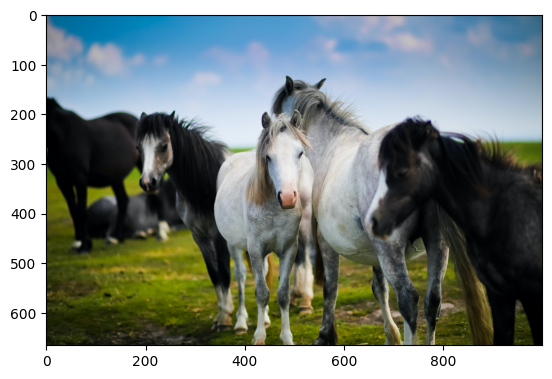

In [ ]:
horse = cv2.imread('/content/drive/MyDrive/colab for cvr/horses.png')
horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)
plt.imshow(horse)

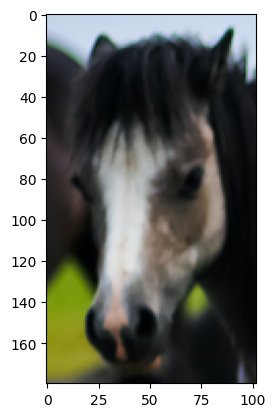

In [ ]:
horse_face = cv2.imread('/content/drive/MyDrive/colab for cvr/horse_face.png')
horse_face = cv2.cvtColor(horse_face, cv2.COLOR_BGR2RGB)
plt.imshow(horse_face)

In [ ]:
horse_face.shape

(180, 102, 3)

In [ ]:
template_height_h,template_width_h,channels_h = horse_face.shape

In [ ]:
template_height_h

180

In [ ]:
template_width_h

102

In [ ]:
channels_h

3

In [ ]:
results_h = cv2.matchTemplate(horse,horse_face,cv2.TM_CCOEFF_NORMED)

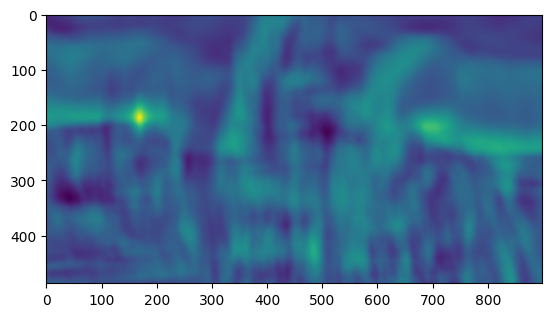

In [ ]:
plt.imshow(results_h)

In [ ]:
min_val_h,max_val_h,min_loc_h,max_loc_h = cv2.minMaxLoc(results_h)

In [ ]:
top_left_h = max_loc_h
top_left_h

(169, 187)

In [ ]:
bottom_right_h = (top_left_h[0]+template_width_h,top_left_h[1]+template_height_h)
bottom_right_h

(271, 367)

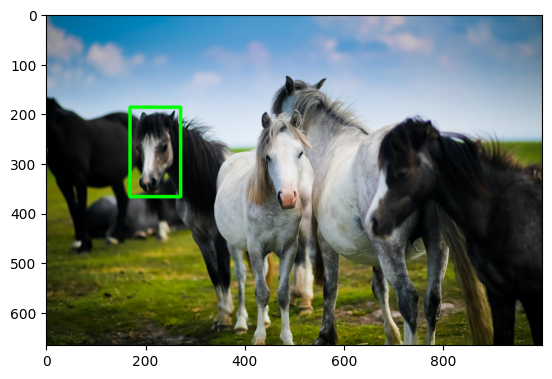

In [ ]:
cv2.rectangle(horse,top_left_h,bottom_right_h,(0,255,0),5)
plt.imshow(horse)

CONCLUSION

The experiment successfully demonstrated the use of template matching to locate sub-images within larger images using OpenCV's cv2.matchTemplate function. By applying this technique:

The location of the template within the larger image was accurately identified based on the maximum match value.
The process involved reading and preprocessing images, performing template matching, and visualizing the results.
The rectangle drawn around the detected region in the larger image confirmed the effectiveness of the matching algorithm.
In the case of both the "boy" and "horse" images, the algorithm was able to find the template images with good accuracy. This confirms that template matching is a viable method for pattern recognition tasks in computer vision. Further improvements could include testing with different templates, applying additional pre-processing steps, or experimenting with other matching methods to enhance robustness and accuracy.